In [2]:
import datetime
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
url = "https://maplelegends.com/ranking/all?page=1"
resp =  requests.get(url)
soup = BeautifulSoup(resp.text)
ranking_table = soup.find(id="rankingTable")

In [4]:
def parse_row(tr, category):
    td = tr.find_all("td")[:6]
    return dict(
        timestamp=datetime.datetime.utcnow().isoformat(),
        category=category,
        rank=int(td[0].b.getText()),
        name=td[2].b.getText().strip(),
        job=td[3].img.get("src").split("/")[-1].rstrip(".png"),
        specialization=td[3].a.get("href").split("/")[-1],
        mastery=td[3].a.getText().lower().strip(),
        level=int(td[5].b.getText())
    )

def parse_page(resp):
    category = resp.url.split("/")[-1].split("?")[0]
    soup = BeautifulSoup(resp.text)
    ranking_table = soup.find(id="rankingTable")
    rows = ranking_table.find_all("tr")
    data = [parse_row(r, category) for r in rows[1:]]
    return data

def parse_total(resp):
    soup = BeautifulSoup(resp.text)
    ranking_table = soup.find(id="rankingTable")
    return int(ranking_table.p.b.getText())

def get_ranking(page):
    url = f"https://maplelegends.com/ranking/all?page={page}"
    return requests.get(url)

In [183]:
total = parse_total(resp)
total

192653

In [6]:
parse_page(resp)

[{'timestamp': '2021-05-08T20:57:31.765226',
  'category': 'all',
  'rank': 1,
  'name': 'Unlucky',
  'job': 'magicia',
  'specialization': 'cleric',
  'mastery': 'bishop',
  'level': 200},
 {'timestamp': '2021-05-08T20:57:31.765226',
  'category': 'all',
  'rank': 2,
  'name': 'Babo',
  'job': 'thief',
  'specialization': 'assassin',
  'mastery': 'night lord',
  'level': 200},
 {'timestamp': '2021-05-08T20:57:31.765226',
  'category': 'all',
  'rank': 3,
  'name': 'Nude',
  'job': 'thief',
  'specialization': 'assassin',
  'mastery': 'night lord',
  'level': 200},
 {'timestamp': '2021-05-08T20:57:31.765226',
  'category': 'all',
  'rank': 4,
  'name': 'JayChou',
  'job': 'magicia',
  'specialization': 'cleric',
  'mastery': 'bishop',
  'level': 200},
 {'timestamp': '2021-05-08T20:57:31.766226',
  'category': 'all',
  'rank': 5,
  'name': 'Zeretius',
  'job': 'bowma',
  'specialization': 'hunter',
  'mastery': 'bowmaster',
  'level': 200}]

In [141]:
parse_total(resp) // 5

38530

In [7]:
pages = parse_total(resp) // 5

res = []
for i in tqdm(np.linspace(1, pages, 20).astype(int)):
    resp = get_ranking(i)
    res.append(parse_page(resp))

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(sum(res, []))
df

,timestamp,category,rank,name,job,specialization,mastery,level
0,2021-05-08T20:57:50.307054,all,1,Unlucky,magicia,cleric,bishop,200
1,2021-05-08T20:57:50.307054,all,2,Babo,thief,assassin,night lord,200
2,2021-05-08T20:57:50.307054,all,3,Nude,thief,assassin,night lord,200
3,2021-05-08T20:57:50.308067,all,4,JayChou,magicia,cleric,bishop,200
4,2021-05-08T20:57:50.308067,all,5,Zeretius,bowma,hunter,bowmaster,200
...,...,...,...,...,...,...,...,...
95,2021-05-08T20:59:10.530088,all,192641,Lawkes,beginner,all,beginner,2
96,2021-05-08T20:59:10.530088,all,192642,Troyy,beginner,all,beginner,2
97,2021-05-08T20:59:10.531088,all,192643,Liridas,beginner,all,beginner,2
98,2021-05-08T20:59:10.531088,all,192644,Footwear,beginner,all,beginner,2


Text(0.5, 1.0, 'ranking vs level')

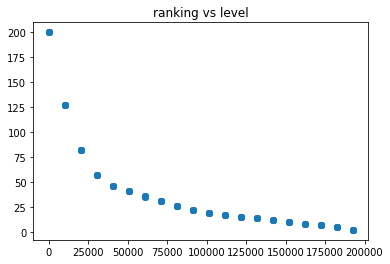

In [17]:
plt.scatter(df["rank"], df["level"])
plt.title("ranking vs level")

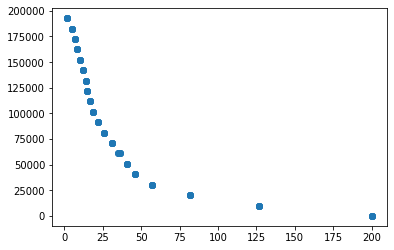

In [13]:
plt.scatter(df["level"], df["rank"])

In [24]:
np.geomspace(2, pages, 25).astype(int)

array([    2,     3,     4,     6,    10,    15,    23,    35,    53,
          80,   121,   184,   277,   418,   631,   952,  1437,  2168,
        3270,  4933,  7441, 11225, 16932, 25542, 38529])

In [25]:
res_geom = []
for i in tqdm(np.geomspace(2, pages, 25).astype(int)):
    resp = get_ranking(i)
    res_geom.append(parse_page(resp))

  0%|          | 0/25 [00:00<?, ?it/s]

Text(0.5, 1.0, 'ranking vs level')

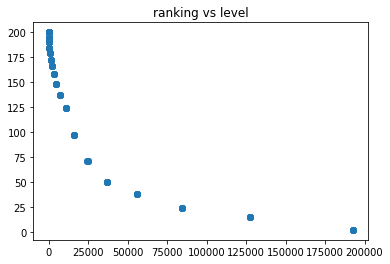

In [27]:
df_geom = pd.DataFrame(sum(res_geom, []))
plt.scatter(df_geom["rank"], df_geom["level"])
plt.title("ranking vs level")

Text(0.5, 1.0, 'ranking vs level')

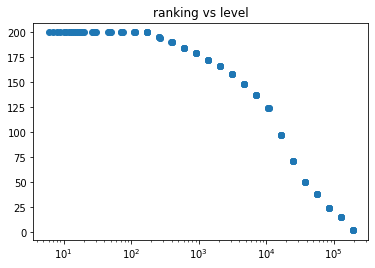

In [32]:
plt.scatter(df_geom["rank"], df_geom["level"])
plt.xscale("log")
plt.title("ranking vs level")

Text(0.5, 1.0, 'ranking vs level')

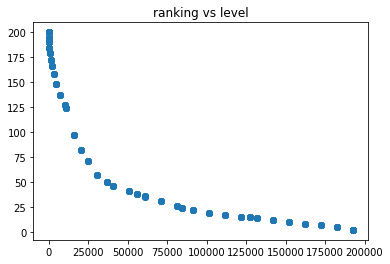

In [54]:
df_full = pd.concat([df, df_geom]).sort_values(["rank"])
plt.scatter(df_full["rank"], df_full["level"])
plt.title("ranking vs level")

Text(0.5, 1.0, 'level vs ranking')

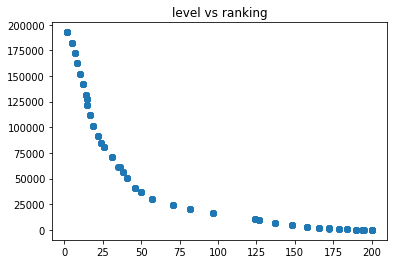

In [247]:
df_full = pd.concat([df, df_geom]).sort_values(["rank"]).drop_duplicates().reset_index()
plt.scatter(df_full["level"], df_full["rank"])
plt.title("level vs ranking")

In [248]:
df_full

,index,timestamp,category,rank,name,job,specialization,mastery,level
0,0,2021-05-08T20:57:50.307054,all,1,Unlucky,magicia,cleric,bishop,200
1,1,2021-05-08T20:57:50.307054,all,2,Babo,thief,assassin,night lord,200
2,2,2021-05-08T20:57:50.307054,all,3,Nude,thief,assassin,night lord,200
3,3,2021-05-08T20:57:50.308067,all,4,JayChou,magicia,cleric,bishop,200
4,4,2021-05-08T20:57:50.308067,all,5,Zeretius,bowma,hunter,bowmaster,200
...,...,...,...,...,...,...,...,...,...
220,122,2021-05-08T21:22:23.330160,all,192643,SxFlameXx,beginner,all,beginner,2
221,123,2021-05-08T21:22:23.330160,all,192644,JDPOOP,beginner,all,beginner,2
222,98,2021-05-08T20:59:10.531088,all,192644,Footwear,beginner,all,beginner,2
223,99,2021-05-08T20:59:10.531088,all,192645,PennyXx,beginner,all,beginner,2


In [249]:
buckets = df_full.groupby("level").max("rank").reset_index()
buckets["n"] = buckets["rank"].diff().abs() / buckets["level"].diff().abs()
buckets = buckets.dropna()
buckets[buckets.n > 10]

,level,index,rank,n
1,5,94,182505,3380.000000
2,7,89,172365,5070.000000
3,8,84,162225,10140.000000
4,10,79,152085,5070.000000
5,12,74,141950,5067.500000
6,14,69,131810,5070.000000
7,15,119,127710,4100.000000
8,17,59,111530,8090.000000
9,19,54,101390,5070.000000
10,22,49,91255,3378.333333


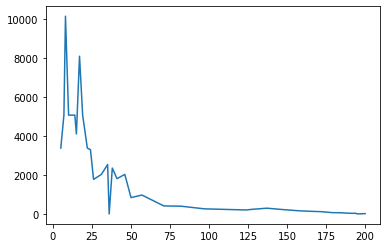

In [250]:
plt.plot(buckets.level, buckets.n)

In [253]:
buckets = df_full.groupby("level").max("rank").reset_index()
buckets

,level,index,rank
0,2,124,192645
1,5,94,182505
2,7,89,172365
3,8,84,162225
4,10,79,152085
5,12,74,141950
6,14,69,131810
7,15,119,127710
8,17,59,111530
9,19,54,101390


In [261]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = buckets["level"]
y = buckets["rank"]

popt, pcov = curve_fit(func, x, y)
popt

array([2.10799242e+05, 3.69514844e-02, 3.55999788e+03])

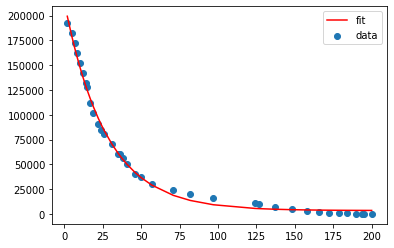

In [255]:
plt.plot(x, func(x, *popt), "r-", label="fit")
plt.scatter(x, y, label="data")
plt.legend()

In [257]:
# misleading, probably not the best way to do things...
chisquare(y, func(x, *popt))

Power_divergenceResult(statistic=42497.84674121198, pvalue=0.0)

In [259]:
func(200, *popt)

3690.105847408199

In [217]:
final_df = df_full.sort_values("rank").reset_index().drop_duplicates()
final_df

,index,timestamp,category,rank,name,job,specialization,mastery,level
0,0,2021-05-08T20:57:50.307054,all,1,Unlucky,magicia,cleric,bishop,200
1,1,2021-05-08T20:57:50.307054,all,2,Babo,thief,assassin,night lord,200
2,2,2021-05-08T20:57:50.307054,all,3,Nude,thief,assassin,night lord,200
3,3,2021-05-08T20:57:50.308067,all,4,JayChou,magicia,cleric,bishop,200
4,4,2021-05-08T20:57:50.308067,all,5,Zeretius,bowma,hunter,bowmaster,200
...,...,...,...,...,...,...,...,...,...
220,122,2021-05-08T21:22:23.330160,all,192643,SxFlameXx,beginner,all,beginner,2
221,123,2021-05-08T21:22:23.330160,all,192644,JDPOOP,beginner,all,beginner,2
222,98,2021-05-08T20:59:10.531088,all,192644,Footwear,beginner,all,beginner,2
223,99,2021-05-08T20:59:10.531088,all,192645,PennyXx,beginner,all,beginner,2


In [224]:
final_df.to_json("../data/initial_sample.json", orient="records")